# Pymaceuticals Inc.
---

### Analysis

Our analysis starts with our Summary Statistics data frame. 
The tendency measures (mean and median) show that most of the drug regimens are used on tumors with an average volume between 50 and 55 mm3 except for Capomulin and Ramicane which tendency is around 40 mm3.
As for the dispersion measures (variance, standard deviation, and standard error), Capomulin and Ramicane both display a smaller dispersion of values compared to all the other drugs.
That means that for those two, our data are closer to the sample mean of 40 mm3 and we have less chances of having outliers (heavy tails). Furthermore, with a smaller standard error, their sample means are closer to the true mean value compared to the other regimens.

Our analysis will continue with a bar and pie chart.
The bar chart shows us that we have more observations for the Capomulin and Ramicane drug regimens than the others. That explains the analysis of the retrieved statistics above (the bigger the sample, the smaller the dispersion).
As for the pie chart, we observe a male dominance in our Mouse IDs (51%).

For the following paragraph, our analysis is focusing on the final tumor volume for 4 drug regimens (Capomulin, Ramicane, Infubinol and Ceftamin).
The boxplot designed for those 4 samples confirms the observations made previously:

1.	Capomulin and Ramicanes’ dispersion is smaller with most of them being closer to 40mm3, compared to Ceftamin. This is explained with our boxes being smaller for the first two but longer for Ceftamin.

2.	Compared to Capomulin and Ramicane, Infubinol has an outlier (possible heavier tail). This is explained with the red dot we see on the graphic.

To finalize this analysis, we get a closer look at the drug regimen, Capomulin.
The line chart shows an inverse relationship between timepoints and tumor volumes: the bigger/later the point in time, the smaller the tumor volume, on average. Of course, this is not a perfect/proportional relationship. 
As for the scatter plot, we observe a positive relationship/correlation between tumor volumes and mouse’s weight: the bigger the weight, the bigger the tumor volumes, on average. The correlation has a value of 84% showing that with a single increase of a mouse’s weight, there’s an increase of 0.84 of the tumor’s volume.

Therefore, we can take three conclusions based on this observation:

1.	Capomulin and Ramicane are the two drugs with a smaller sample dispersion.

2.	Infubinol is most likely to be heavy tailed as it shows an outlier.

3.	There’s a positive correlation between a mouse weight and a tumor’s volume in the Capomulin regimen.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib inline

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice = len(df["Mouse ID"].unique())
mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = df[df[['Mouse ID',"Timepoint"]].duplicated()]
duplicate
#The below data frame displays the mouse ID with the exact timepoint duplicates and the rest of its data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
#First I dropped all the dupe Timepoints and then, I'm getting rid of the Mouse ID found in the cell above.
nodupe_df = df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_df = nodupe_df.drop(nodupe_df.loc[nodupe_df['Mouse ID']== 'g989'].index)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
mice = clean_df['Mouse ID'].nunique()
mice

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
stat_df = pd.concat([mean,median,var,std,sem], axis=1)
#Renaming my columns
stat_df.columns = ['Mean Tumor Volume','Median Tumor Volume','Tumor Volume Variance',
                   'Tumor Volume Std. Dev','Tumor Volume Std. Err.']
stat_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Observed Number of Mouse IDs per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

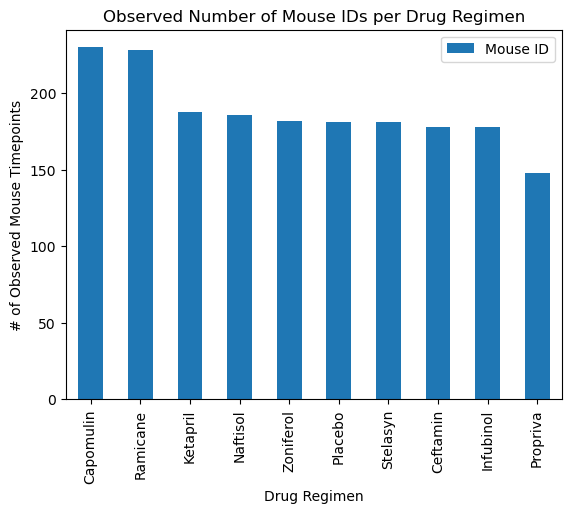

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

#First I filter my columns to have Mouse IDs and Drug Regimen
bar_df = pd.DataFrame(clean_df.groupby('Drug Regimen')['Mouse ID'].count().sort_values(ascending = False))

#Displaying the chart
bar_df.plot(kind='bar', ylabel ='# of Observed Mouse Timepoints', title ='Observed Number of Mouse IDs per Drug Regimen')

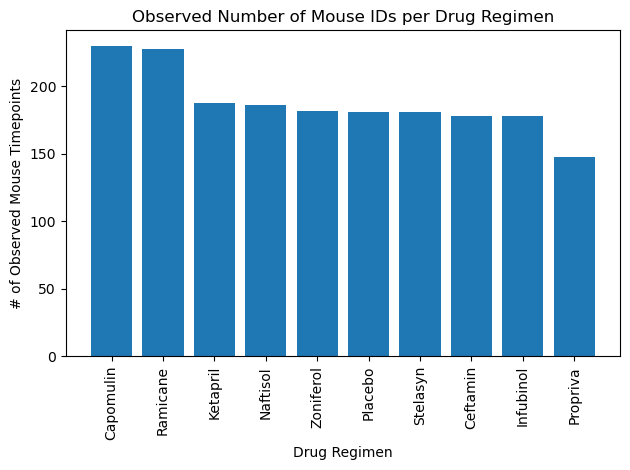

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

#Creating my axis based on the dataframe in the previous cell
x_axis = bar_df.index
y_axis = bar_df['Mouse ID']
#Generating and displaying the chart with pyplot
plt.bar(x_axis, y_axis)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Observed Number of Mouse IDs per Drug Regimen')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

array([<Axes: ylabel='Sex'>], dtype=object)

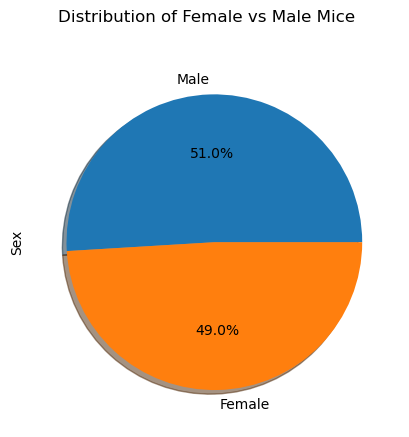

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Extracting values
pie = clean_df['Sex'].value_counts()

#Displaying chart
pie.plot(kind = 'pie', subplots = True, autopct = '%1.1f%%', ylabel='Sex', shadow = True,
        title = 'Distribution of Female vs Male Mice')

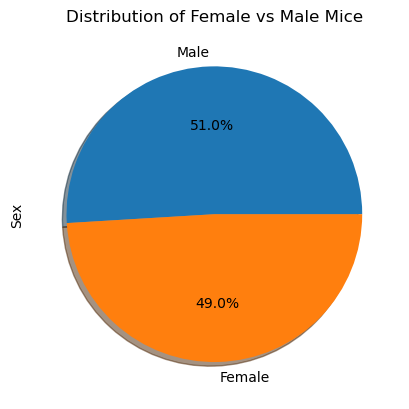

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#We are still using the series created in the cell above called 'pie'
plt.pie(pie, autopct = '%1.1f%%', shadow = True, labels = pie.index)
plt.ylabel('Sex')
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_df,last_timepoint, on = 'Mouse ID', how = 'outer')
merged_df = merged_df.rename(columns = {'Timepoint_y':'Max Timepoint',
                                       'Timepoint_x':'Timepoint'})
merged_df.sample(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
1364,p438,Ceftamin,Female,11,26,35,57.538555,1,45
275,l897,Capomulin,Male,17,19,10,46.154737,0,45
1394,q511,Zoniferol,Female,2,28,0,45.000000,0,45
1012,k210,Ceftamin,Male,15,28,5,47.918998,0,45
1133,l725,Naftisol,Female,8,26,15,54.244563,2,45
1839,y865,Ceftamin,Male,23,26,30,59.033275,3,45
1074,k894,Zoniferol,Female,13,29,0,45.000000,0,45
386,r944,Capomulin,Male,12,25,25,41.086991,1,45
1681,w422,Ketapril,Female,18,26,0,45.000000,0,45
1552,t724,Naftisol,Female,2,25,15,55.584617,0,45


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
#I chose to make a list of the 4 regimen and then loop through the table to add the tumor volume for each.

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor vol data (for plotting)
#I chose to make a list for each of the four regiments we are studying and calculate the IQR for each
Capomulin_tumorvol =[]
Ramicane_tumorvol =[]
Infubinol_tumorvol =[]
Ceftamin_tumorvol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for i,c in enumerate(merged_df['Drug Regimen']):
    # add subset 
    if (c == treatments[0]) & (merged_df['Timepoint'][i]==merged_df['Max Timepoint'][i]):
        Capomulin_tumorvol.append(merged_df['Tumor Volume (mm3)'][i])
        
    if (c == treatments[1]) & (merged_df['Timepoint'][i]==merged_df['Max Timepoint'][i]):
        Ramicane_tumorvol.append(merged_df['Tumor Volume (mm3)'][i])
        
    if (c == treatments[2]) & (merged_df['Timepoint'][i]==merged_df['Max Timepoint'][i]):
        Infubinol_tumorvol.append(merged_df['Tumor Volume (mm3)'][i])
        
    if (c == treatments[3]) & (merged_df['Timepoint'][i]==merged_df['Max Timepoint'][i]):
        Ceftamin_tumorvol.append(merged_df['Tumor Volume (mm3)'][i])
        
    # Determine outliers using upper and lower bounds
        # first, we find the quartiles for each (I turned them into df because the quantile function wasn't working on lists)
Capomulin_quartiles = pd.DataFrame(Capomulin_tumorvol).quantile([0.25,0.5,0.75])
Ramicane_quartiles = pd.DataFrame(Ramicane_tumorvol).quantile([0.25,0.5,0.75])
Infubinol_quartiles = pd.DataFrame(Infubinol_tumorvol).quantile([0.25,0.5,0.75])
Ceftamin_quartiles = pd.DataFrame(Ceftamin_tumorvol).quantile([0.25,0.5,0.75])

        #second, we calculate the iqr for each
    
Capomulin_iqr = st.iqr(Capomulin_tumorvol)
Ramicane_iqr = st.iqr(Ramicane_tumorvol)
Infubinol_iqr = st.iqr(Infubinol_tumorvol)
Ceftamin_iqr = st.iqr(Ceftamin_tumorvol)

        #lastly, we calculate the outliers
Capomulin_outliers = [x for x in Capomulin_tumorvol if (x < Capomulin_quartiles[0][0.25] - 1.5*Capomulin_iqr) | 
                      (x>Capomulin_quartiles[0][0.75] + 1.5*Capomulin_iqr)]
Ramicane_outliers = [x for x in Ramicane_tumorvol if (x < Ramicane_quartiles[0][0.25] - 1.5*Ramicane_iqr) | 
                     (x>Ramicane_quartiles[0][0.75] + 1.5*Ramicane_iqr)]
Infubinol_outliers = [x for x in Infubinol_tumorvol if (x < Infubinol_quartiles[0][0.25] - 1.5*Infubinol_iqr) |
                      (x>Infubinol_quartiles[0][0.75] + 1.5*Infubinol_iqr)]
Ceftamin_outliers = [x for x in Ceftamin_tumorvol if (x < Ceftamin_quartiles[0][0.25] - 1.5*Ceftamin_iqr) |
                     (x>Ceftamin_quartiles[0][0.75] + 1.5*Ceftamin_iqr)]
#Printing my outliers for each
print(f"Capomulin's outliers are {Capomulin_outliers}")
print(f"Ramicane's outliers are {Ramicane_outliers}")
print(f"Infubinol's outliers are {Infubinol_outliers}")
print(f"Ceftamin's outliers are {Ceftamin_outliers}")

Capomulin's outliers are []
Ramicane's outliers are []
Infubinol's outliers are [36.3213458]
Ceftamin's outliers are []


<Axes: title={'center': 'Tumor Volume for each treatment group in mm3'}, ylabel='Final Tumor Volume (mm3)'>

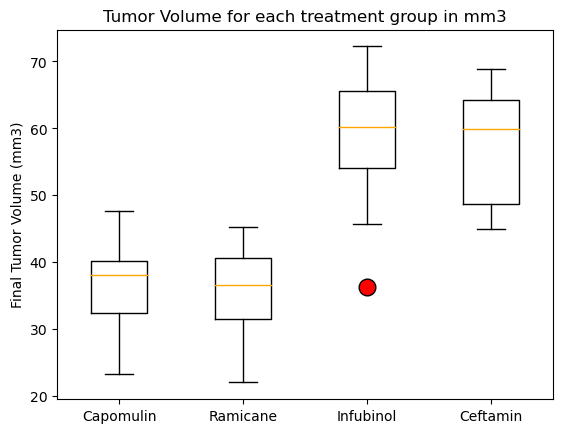

In [13]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#first we generate a dataframe
data = pd.DataFrame({"Capomulin":pd.Series(Capomulin_tumorvol),
                    "Ramicane":pd.Series(Ramicane_tumorvol),
                    "Infubinol":pd.Series(Infubinol_tumorvol),
                    "Ceftamin":pd.Series(Ceftamin_tumorvol)})
#Generate the graph. A lot of customization was required for it to look like the provided example
data.plot(kind='box',
          ylabel = 'Final Tumor Volume (mm3)',
          title='Tumor Volume for each treatment group in mm3',
         medianprops=dict(color='orange'),
         flierprops = dict( markerfacecolor='red', markersize=12),
         boxprops = dict(color = 'black'),
         capprops = dict(color = 'black'),
         whiskerprops = dict(color = 'black'))

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin Treatment of Mouse ID s710'}, xlabel='Timepoint (days)', ylabel='Tumor Volume (mm3)'>

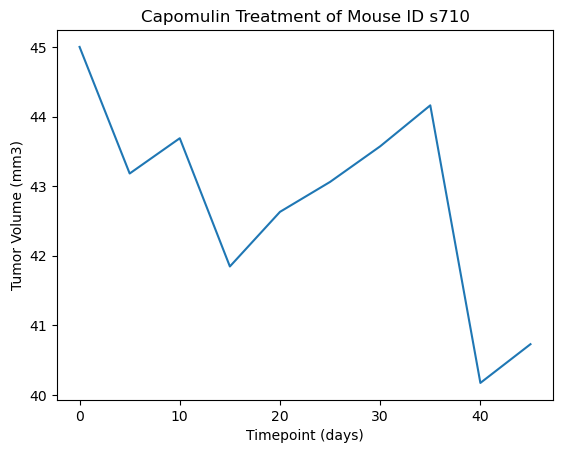

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
    
    #The mouse chosen is s710
s710_df = clean_df.loc[clean_df['Mouse ID']== 's710']
s710_chart_df = s710_df[['Tumor Volume (mm3)','Timepoint']].set_index('Timepoint')
s710_chart_df.plot(kind='line',
                  xlabel = 'Timepoint (days)',
                  ylabel = 'Tumor Volume (mm3)',
                  legend = False,
                  title = 'Capomulin Treatment of Mouse ID s710')

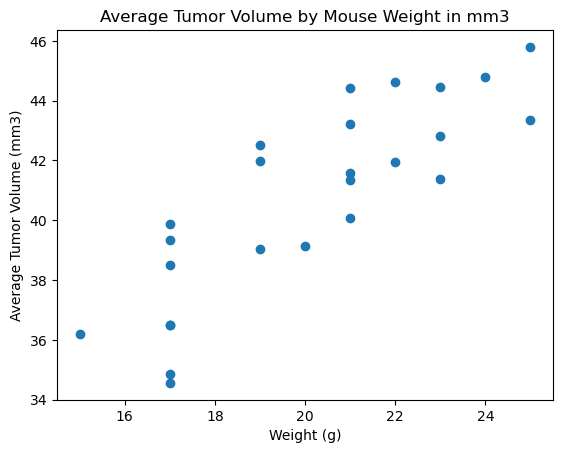

In [15]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#First, I retrieve the entire Capomulin regimen
Capomulin = clean_df.loc[clean_df['Drug Regimen']== 'Capomulin']

#Second, I  group my Capomulin df by Mouse ID to retreive the average Tumor Volume
average_df = pd.DataFrame(Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean())

#Third, I group my Capomulin df by Mouse ID again to retreive the weight.
weight_df1 = Capomulin[['Mouse ID', 'Weight (g)']]
weight_df =weight_df1.drop_duplicates()
weight_df = weight_df.set_index('Mouse ID')

#Fourth, I merge my two data frames
chart_df = pd.merge(average_df,weight_df, on = 'Mouse ID')

#Fifth, I build the chart
x_axis = chart_df['Weight (g)']
y_axis = chart_df['Tumor Volume (mm3)']
plt.scatter(x_axis,y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Mouse Weight in mm3')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


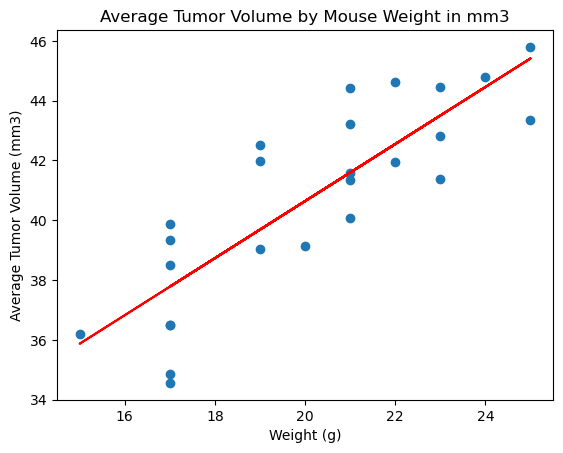

In [16]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#Find the corr using the correlation matrix
corr = chart_df.corr()
print(f"The correlation between mouse weight and the average tumor volume is {round(corr['Weight (g)'][0],2)}")

#Find the slope and intercept of our line of best fit with the x_axis retreived in the previous cell
output = st.linregress(x_axis, y_axis)
slope = output[0]
intercept = output[1]
regressline = slope*x_axis+intercept

#Generate the graph
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regressline, color = 'r')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Mouse Weight in mm3')
plt.show()